In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Bike Datsets
bike=pd.read_csv('hour.csv')

In [4]:
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


<AxesSubplot:xlabel='cnt'>

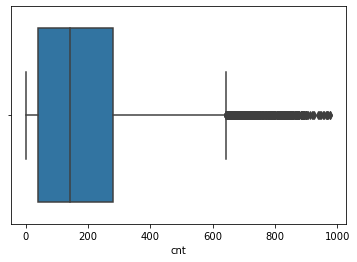

In [7]:
sns.boxplot(x=bike['cnt'],data=bike)

In [8]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
del bike['instant']

In [10]:
bike.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
bike['dteday']=pd.to_datetime(bike['dteday'], errors='coerce')

In [13]:
bike.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [23]:
bike_daily=pd.pivot_table(bike, index=bike['dteday'],values=['atemp','temp','cnt'], aggfunc={'atemp':np.mean,'temp':np.mean,'cnt':np.sum})

In [24]:
bike_daily

,atemp,cnt,temp
dteday,,,
2011-01-01,0.363625,985,0.344167
2011-01-02,0.353739,801,0.363478
2011-01-03,0.189405,1349,0.196364
2011-01-04,0.212122,1562,0.200000
2011-01-05,0.229270,1600,0.226957
...,...,...,...
2012-12-27,0.226642,2114,0.254167
2012-12-28,0.255046,3095,0.253333
2012-12-29,0.242400,1341,0.253333


In [17]:
bike_daily_provided=pd.read_csv('day.csv')

In [18]:
bike_daily_provided

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Electricity Dataset

In [27]:
elec=pd.read_csv('elec.csv')

In [29]:
elec

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP


## Forest Covertype Dataset

In [30]:
forest=pd.read_csv('covtype.csv')

In [31]:
forest

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0,0,0,0,0,0,0,0,0,5
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0,0,0,0,0,0,0,0,0,5
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,2
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,2
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.425000,0.303030,0.060845,0.245478,0.015175,0.944882,0.933071,0.464567,0.116688,...,0,0,0,0,0,0,0,0,0,3
581008,0.266133,0.422222,0.287879,0.047960,0.239018,0.013348,0.944882,0.933071,0.468504,0.117803,...,0,0,0,0,0,0,0,0,0,3
581009,0.263632,0.441667,0.257576,0.042949,0.232558,0.012646,0.929134,0.948819,0.511811,0.119058,...,0,0,0,0,0,0,0,0,0,3
581010,0.262631,0.472222,0.227273,0.042949,0.229974,0.012646,0.905512,0.964567,0.562992,0.120452,...,0,0,0,0,0,0,0,0,0,3


In [33]:
forest['class'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64

In [39]:
forest_filtered=forest[(forest['class']==1) | (forest['class']==2)]

In [42]:
forest_filtered.reset_index(drop=True,inplace=True)

In [43]:
forest_filtered

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,2
1,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,2
2,0.360180,0.366667,0.090909,0.214746,0.204134,0.009414,0.905512,0.933071,0.551181,0.840792,...,0,0,0,0,0,0,0,0,0,2
3,0.513757,0.419444,0.166667,0.265569,0.257106,0.738092,0.921260,0.944882,0.535433,0.564757,...,0,0,0,0,0,0,0,0,0,2
4,0.441721,0.372222,0.333333,0.107373,0.312661,0.451735,0.976378,0.881890,0.362205,0.849157,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495136,0.379190,0.080556,0.196970,0.279170,0.388889,0.292398,0.846457,0.830709,0.511811,0.082532,...,0,0,0,0,0,0,0,0,0,2
495137,0.377689,0.058333,0.196970,0.271296,0.385013,0.288183,0.830709,0.834646,0.531496,0.086156,...,0,0,0,0,0,0,0,0,0,2
495138,0.376688,0.047222,0.196970,0.265569,0.382429,0.283968,0.818898,0.830709,0.543307,0.089781,...,0,0,0,0,0,0,0,0,0,2
495139,0.375688,0.044444,0.212121,0.261274,0.365633,0.279753,0.818898,0.830709,0.543307,0.093545,...,0,0,0,0,0,0,0,0,0,2


In [48]:
forest_filtered['class'].value_counts(normalize=True)

2    0.572162
1    0.427838
Name: class, dtype: float64

# Airlines Dataset 

In [49]:
airlines=pd.read_csv('airlines.csv')

In [51]:
airlines

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269.0,SFO,IAH,3,15.0,205.0,1
1,US,1558.0,PHX,CLT,3,15.0,222.0,1
2,AA,2400.0,LAX,DFW,3,20.0,165.0,1
3,AA,2466.0,SFO,DFW,3,20.0,195.0,1
4,AS,108.0,ANC,SEA,3,30.0,202.0,0
...,...,...,...,...,...,...,...,...
539378,CO,178.0,OGG,SNA,5,1439.0,326.0,0
539379,FL,398.0,SEA,ATL,5,1439.0,305.0,0
539380,FL,609.0,SFO,MKE,5,1439.0,255.0,0
539381,UA,78.0,HNL,SFO,5,1439.0,313.0,1


In [52]:
airlines['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

## KDDCUP 99 Network Intrusion Dataset

In [86]:
kdd=pd.read_csv('kddcup99.csv')

In [87]:
kdd

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,udp,domain_u,SF,46.0,46.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,normal.
1,0.0,icmp,ecr_i,SF,520.0,0.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
2,0.0,icmp,ecr_i,SF,1032.0,0.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
3,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
4,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,11.0,0.04,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.0,icmp,ecr_i,SF,520.0,0.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
494017,0.0,icmp,ecr_i,SF,1032.0,0.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
494018,0.0,icmp,ecr_i,SF,1032.0,0.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
494019,0.0,icmp,ecr_i,SF,1032.0,0.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [88]:
kdd['class'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: class, dtype: int64

In [96]:
col=kdd['class'].value_counts()

In [97]:
class_values=list(col.index)

In [98]:
class_values

['smurf.',
 'neptune.',
 'normal.',
 'back.',
 'satan.',
 'ipsweep.',
 'portsweep.',
 'warezclient.',
 'teardrop.',
 'pod.',
 'nmap.',
 'guess_passwd.',
 'buffer_overflow.',
 'land.',
 'warezmaster.',
 'imap.',
 'rootkit.',
 'loadmodule.',
 'ftp_write.',
 'multihop.',
 'phf.',
 'perl.',
 'spy.']

In [99]:
class_values.remove('normal.')

In [100]:
attack_values=class_values

In [101]:
attack_values

['smurf.',
 'neptune.',
 'back.',
 'satan.',
 'ipsweep.',
 'portsweep.',
 'warezclient.',
 'teardrop.',
 'pod.',
 'nmap.',
 'guess_passwd.',
 'buffer_overflow.',
 'land.',
 'warezmaster.',
 'imap.',
 'rootkit.',
 'loadmodule.',
 'ftp_write.',
 'multihop.',
 'phf.',
 'perl.',
 'spy.']

In [102]:
kdd.replace(class_values,'attack', inplace=True)

In [103]:
kdd['class'].value_counts()

attack     396743
normal.     97278
Name: class, dtype: int64

In [104]:
kdd.replace('normal.','normal', inplace=True)

In [105]:
kdd['class'].value_counts()

attack    396743
normal     97278
Name: class, dtype: int64

## Power Supply Dataset

In [106]:
ps=pd.read_csv('powersupply.csv')

In [107]:
ps

,attribute0,attribute1,class
0,117.4,127.0,0
1,139.1,126.0,1
2,128.0,120.0,2
3,127.0,112.0,3
4,122.8,110.0,4
...,...,...,...
29923,152.0,144.0,19
29924,148.0,140.0,20
29925,151.0,143.0,21
29926,168.0,161.0,22


In [114]:
ps['class'].value_counts(sort=True)

6     1248
16    1247
14    1247
13    1247
12    1247
11    1247
10    1247
8     1247
23    1247
7     1247
22    1247
0     1247
21    1247
5     1247
20    1247
4     1247
19    1247
3     1247
18    1247
2     1247
17    1247
1     1247
15    1247
9     1246
Name: class, dtype: int64

## SEA Dataset

In [115]:
sea=pd.read_csv('se.csv')
.

In [116]:
sea

,at1,at2,at3,cl
0,4.551125,8.715687,5.348319,0
1,4.569529,9.455497,2.354468,0
2,0.878608,0.919708,4.903802,1
3,8.395622,5.512551,3.136421,0
4,4.948680,3.101139,0.806539,1
...,...,...,...,...
49995,9.130110,8.923959,7.108004,0
49996,9.615330,4.272174,3.836167,0
49997,0.610296,5.829091,3.788995,1
49998,6.114687,4.449496,0.754676,0


In [118]:
sea_tst=pd.read_csv('sea_tst1.csv')

In [119]:
sea_tst

,at1,at2,at3,cl
0,2.595464,2.162700,1.987631,1
1,4.156758,5.637664,9.616178,0
2,7.608149,1.747323,2.570211,0
3,0.362580,3.010135,4.650799,1
4,5.840956,6.141438,7.172207,0
...,...,...,...,...
2495,5.062891,4.767857,7.232495,0
2496,2.545584,2.298101,1.765905,1
2497,7.588520,8.970392,0.334022,0
2498,3.408042,2.493689,2.628599,1


### RBF Dataset

In [120]:
from skmultiflow.data.random_rbf_generator import RandomRBFGenerator

In [121]:
stream = RandomRBFGenerator(model_random_state=99, sample_random_state=50, n_classes=2,n_features=10, n_centroids=50)

In [123]:
circles=stream.next_sample(500000)

In [128]:
features=circles[0]
label=circles[1]
df=pd.DataFrame(features)
df['class']=label
df


,0,1,2,3,4,5,6,7,8,9,class
0,0.449523,1.092011,0.347784,0.921817,0.195035,0.288344,0.829317,0.268480,0.809624,0.238504,1
1,0.703749,0.657528,0.203435,0.561369,0.766593,0.610812,0.604531,0.887346,-0.042446,0.091464,1
2,0.277972,0.056401,0.809462,0.605728,0.950807,0.255121,0.739925,0.339171,0.171046,0.792833,1
3,0.336962,0.109236,0.859872,0.618686,0.857552,0.194692,0.667504,0.276844,0.155427,0.762623,1
4,0.718862,0.230789,0.450138,0.030191,0.426795,0.038417,0.343185,0.117699,0.964465,0.016356,0
...,...,...,...,...,...,...,...,...,...,...,...
499995,0.679943,0.584708,0.735946,0.093577,0.864339,0.600058,0.250069,0.098270,0.996016,0.088904,0
499996,0.567154,0.734574,0.214511,0.653736,0.439623,0.600630,0.618944,0.598074,0.689251,0.062746,1
499997,0.420769,0.624035,0.629584,0.799697,1.034751,0.289668,0.303846,0.351473,0.565633,0.320367,0
499998,0.729919,0.815358,0.894292,0.159870,0.486563,0.526969,0.476495,0.765078,0.872042,0.269524,0


# Circles Dataset

In [146]:
circle=pd.read_csv('circles.csv')

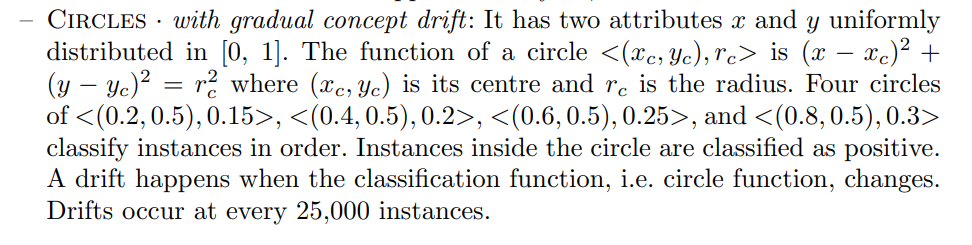

In [147]:
circle

,x,y,class
0,0.13846,0.20431,p
1,0.01547,0.43077,p
2,0.60966,0.70351,p
3,0.31175,0.47051,n
4,0.25311,0.57740,p
...,...,...,...
99995,0.50511,0.06853,p
99996,0.41846,0.71759,p
99997,0.59001,0.62973,n
99998,0.35948,0.03234,p


In [243]:
circle['class'].value_counts(normalize=True)

n    0.5012
p    0.4988
Name: class, dtype: float64

In [148]:
circle['cent']=np.power(circle['x'],2)+np.power(circle['y'],2)

In [149]:
circle=circle[25000:50000]

<AxesSubplot:xlabel='cent', ylabel='class'>

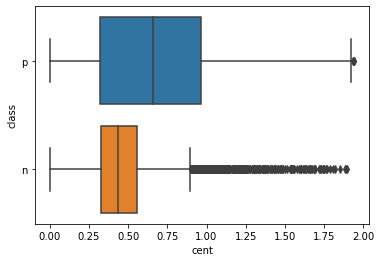

In [153]:
import seaborn as sns
sns.boxplot(x=circle['cent'], y=circle['class'], data=circle)

In [132]:
circle2=pd.read_csv('circles2.csv')

In [133]:
circle2

,x,y,class
0,0.06310,0.53657,n
1,0.69356,0.20525,p
2,0.25039,0.51195,n
3,0.42553,0.72471,n
4,0.24392,0.61976,n
...,...,...,...
99995,0.75631,0.42896,n
99996,0.30519,0.76699,n
99997,0.93889,0.98288,p
99998,0.93380,0.32575,n


## Creating our own circle dataset

In [166]:
import random as r
r.uniform(0,1)


0.5486715821521054

In [233]:
x=np.random.uniform(0,1,50000)

In [232]:
y=np.random.uniform(0,1,50000)

In [234]:
a=0.2
b=0.5

In [235]:
r= np.power((x-a),2)+np.power((y-b),2)

In [236]:
r;

In [237]:
x=pd.DataFrame(x,columns=['x'])
y=pd.DataFrame(y,columns=['y'])
r=pd.DataFrame(r,columns=['r'])
df=pd.concat([x,y,r],axis=1)

In [238]:
df

,x,y,r
0,0.943354,0.682627,0.585927
1,0.170387,0.332775,0.028841
2,0.957955,0.562016,0.578342
3,0.290223,0.453750,0.010279
4,0.925652,0.015701,0.761117
...,...,...,...
49995,0.012513,0.979530,0.265100
49996,0.615467,0.404321,0.181767
49997,0.745028,0.443791,0.300215
49998,0.914950,0.223373,0.587676


In [239]:
df['class']=np.where(df['r']<0.15,'p','n')

In [240]:
df

,x,y,r,class
0,0.943354,0.682627,0.585927,n
1,0.170387,0.332775,0.028841,p
2,0.957955,0.562016,0.578342,n
3,0.290223,0.453750,0.010279,p
4,0.925652,0.015701,0.761117,n
...,...,...,...,...
49995,0.012513,0.979530,0.265100,n
49996,0.615467,0.404321,0.181767,n
49997,0.745028,0.443791,0.300215,n
49998,0.914950,0.223373,0.587676,n


In [242]:
df['class'].value_counts(normalize=True)

n    0.61794
p    0.38206
Name: class, dtype: float64

<AxesSubplot:xlabel='r', ylabel='class'>

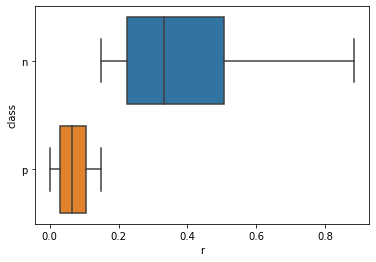

In [244]:
sns.boxplot(x=df['r'], y=df['class'], data=df)